In [13]:
%matplotlib inline

import numpy as np
from urllib.request import urlretrieve

URL = "https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec"
DEST = "./data/{}.data_spec"

class Buoy:
    def __init__(self, buoy):
        self.buoy = buoy
        self.dates = []
        self.E = np.array([])
        self.f = np.array([])

    def get_data(self, dest=""):
        url = URL.format(self.buoy)
        if dest == "":
            dest = DEST.format(self.buoy)
        urlretrieve(url, dest)
        self.dest = dest
        return dest

    def read_data(self, dest):
        dates = []
        energies = []
        frequencies = []

        with open(dest) as fp:
            for _ in range(3):
                next(fp)
            
            for l in fp:
                dates.append(l.split()[0:5])
                energies.append([float(e) for e in l.split()[6::2]])
                freqs = l.split()[7::2]
                frequencies.append([float(i[1:-1]) for i in freqs])
            fp.close()

            E = np.array(energies)
            f = np.array(frequencies)
        return (E, f)

    def bootstrap(self, E, f):
        self.Emid = self.calc_midpoint(E)
        self.fmid = self.calc_midpoint(f)
        self.df = np.diff(f)

    def calc_swh(self):
        product = self.df * self.Emid
        return 4 * np.sqrt(product.sum(axis=1))
    
    def calc_midpoint(self, series):
        nofirst = series[:, 1:]  # every element in a row, not the first
        nolast = series[:, :-1]  # every element in a row, not the last
        mid = 0.5 * (nolast + nofirst)
        return mid

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


from the top level directory, install the **swel** package with pip:

`> pip install .`



In [9]:
from swel.buoy import Buoy
b = Buoy(46054)
print('b',type(b))
dest = b.get_data()
(E,f) = b.read_data(dest)
print('E',E.shape)
b.bootstrap(E,f)
swh = b.calc_swh()


DEBUG:root:initializing buoy


b <class 'swel.buoy.Buoy'>
E (1075, 46)


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/ncs/anaconda3/envs/devries/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/ncs/anaconda3/envs/devries/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


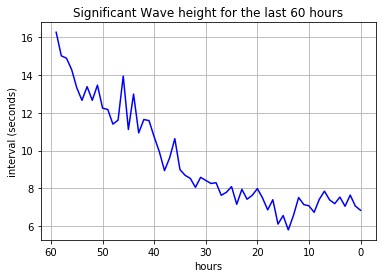

In [11]:
import matplotlib.pyplot as plt

signif_waves = swh[0:60]*3.28

fig, ax = plt.subplots()
ax.plot(signif_waves, 'b')
plt.gca().invert_xaxis()
ax.set(xlabel='hours', ylabel='interval (seconds)',
       title='Significant Wave height for the last 60 hours')
ax.grid()

<class 'pandas.core.frame.DataFrame'>


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

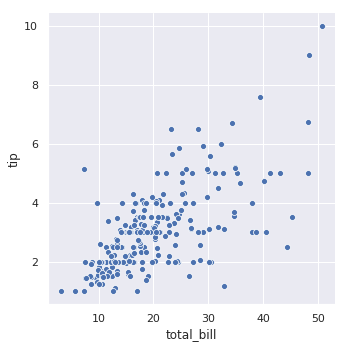

In [8]:
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);
# print(type(tips))
tips.columns